# Code

In [ ]:
import numpy as np

# Define a function to compute the approximate gradient
# input: multivariate function that range be R; x: position want to calc gradient,represented as a vector; h: parameter to estimate
# output: gradient vector at that position
def compute_gradient(f, x, h=1e-6):
    gradient = np.zeros_like(x)
    for i in range(len(x)):
        x_plus_h = x.copy()
        x_minus_h = x.copy()
        x_plus_h[i] += h
        x_minus_h[i] -= h
        gradient[i] = (f(x_plus_h) - f(x_minus_h)) / (2*h)
    return gradient


def gradient_descent(**kwargs):
    valid_args = {'f', 'initial_point', 'learning_rate', 'max_iterations', 'tolerance'}

    # Check for invalid keyword arguments
    invalid_args = set(kwargs.keys()) - valid_args
    if invalid_args:
        raise ValueError(f"Invalid keyword arguments: {', '.join(invalid_args)}")

    # Check if required keyword arguments are provided
    if 'f' not in kwargs:
        raise ValueError("Function 'f' must be provided.")
    if 'initial_point' not in kwargs:
        raise ValueError("Initial point must be provided.")

    # Extracting keyword arguments with default values
    f = kwargs.get('f')
    initial_point = kwargs.get('initial_point')
    learning_rate = kwargs.get('learning_rate', 0.05)
    max_iterations = kwargs.get('max_iterations', 1000)
    tolerance = kwargs.get('tolerance', 1e-6)

    print('(time, x, f(x)):')
    x = initial_point
    x_list = [np.copy(x)]
    func_list = [f(x)]
    for i in range(max_iterations):
        print(i,x,f(x))
        gradient = compute_gradient(f, x)
        x -= learning_rate * gradient
        x_list.append(np.copy(x))
        func_list.append(f(x))
        if np.linalg.norm(gradient) < tolerance:
            print(f"Gradient descent converged at iteration {i+1}")
            break
    else:
        print("Gradient descent did not converge within the maximum number of iterations.")
    return x

In [ ]:
import matplotlib.pyplot as plt

def csv_to_numpy(file_path):

    data = np.genfromtxt(file_path, delimiter=',', skip_header=1)
    return data

class LinearRegression:
    def __init__(self, learning_rate=0.06, max_iterations=1000, tolerance=1e-6):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.tolerance = tolerance
        self.weights = None
        self.X = None
        self.y = None

    def loss_function(self,w):
        # Compute predictions
        predictions = self.X @ w.T

        # Compute error vector
        error = predictions - self.y
        return np.sum(error**2)/len(self.y)

    def fit(self, X, y):
        self.y = y
        # Add bias term (intercept) to X (a column with value 1)
        # dimension (n,2)
        self.X = np.column_stack((np.ones(len(X)), X))

        # Initialize weights all 0
        # the shape of weight should be the shape of weights will be (1,2)
        init_weights = np.zeros(self.X.shape[1])

        # Perform gradient descent
        self.weights = gradient_descent(f = self.loss_function, initial_point = init_weights,
                                        learning_rate = self.learning_rate, max_iterations = self.max_iterations,
                                        tolerance = self.tolerance )

    def predict(self, X):
        # Add bias term (intercept) to X
        X = np.column_stack((np.ones(len(X)), X))
        # Predict
        return X @ self.weights.T

# Test

(time, x, f(x)):
0 [0. 0.] 812.2098274433772
1 [1.58616356 9.14551114] 580.6907972716353
2 [0.56220914 1.42139526] 417.319016070919
3 [1.72376693 7.85821734] 301.97023041064836
4 [1.04555261 2.40938214] 220.4652576643245
5 [1.90642068 6.93798824] 162.81362768584796
6 [1.47030336 3.09247168] 121.97610666286923
7 [2.1178418  6.27684021] 92.99281338320617
8 [1.85085005 3.56119224] 72.36891848351054
9 [2.34666098 5.79867568] 57.64182830188186
10 [2.1974318  3.87931141] 47.07623690511399
11 [2.5849674  5.44986344] 39.44926944533161
12 [2.51736063 4.0917426 ] 33.899101095018125
13 [2.82728349 5.19260186] 29.81829878133856
14 [2.81588279 4.23011569] 26.778672996629304
15 [3.06984274 5.00024285] 24.47833062317921
16 [3.0967858  4.31670195] 22.704369894670027
17 [3.31008099 4.85399719] 21.306596247720268
18 [3.36282623 4.36717936] 20.179003147988038
19 [3.54627807 4.74061327] 19.24672387800025
20 [3.61603123 4.392581  ] 18.456837966842766
21 [3.77730551 4.65074154] 17.77189350844397
22 [3.85791

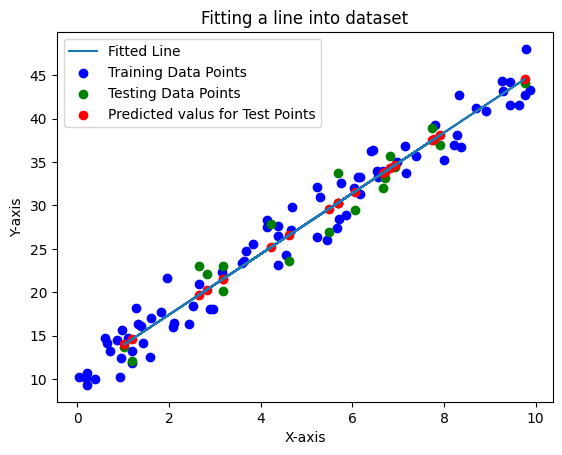

In [ ]:
# Generate synthetic dataset
np.random.seed(0)  # for reproducibility

# Generate features (X) with random values
X = np.random.rand(100) * 10  # 100 samples, 1 feature
#print(X)

# Generate target values (y) using a linear relationship with some noise
true_slope = 3.5
true_intercept = 10.0
noise = np.random.randn(100) * 2.0  # Gaussian noise with mean 0 and standard deviation 2
y = true_slope * X + true_intercept + noise
#print(y)

# Split dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression(0.03)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
#print(y_pred)

# Optionally, visualize the dataset
import matplotlib.pyplot as plt

plt.plot(X_test, y_pred, label='Fitted Line')
plt.scatter(X_train, y_train, color='blue', label='Training Data Points')
plt.scatter(X_test, y_test, color='green', label='Testing Data Points')
plt.scatter(X_test, y_pred, color='red', label='Predicted valus for Test Points')
# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Fitting a line into dataset')
plt.legend()

# Show the plot
plt.show()


In [ ]:
import numpy as np

def calculate_mse(y_true, y_pred):
    """
    Calculate Mean Squared Error (MSE)

    Args:
        y_true (array-like): Array of true values
        y_pred (array-like): Array of predicted values

    Returns:
        float: Mean Squared Error
    """
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

def calculate_rmse(y_true, y_pred):
    """
    Calculate Root Mean Squared Error (RMSE)

    Args:
        y_true (array-like): Array of true values
        y_pred (array-like): Array of predicted values

    Returns:
        float: Root Mean Squared Error
    """
    mse = calculate_mse(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

mse = calculate_mse(y_test, y_pred)
rmse = calculate_rmse(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 3.6710131285311975
Root Mean Squared Error (RMSE): 1.9159888122145174


# 3d example

Streaming output truncated to the last 5000 lines.
5001 [4.16432509 2.00200864 1.67681001] 3.5972102497449385
5002 [4.16468294 2.00198092 1.67674083] 3.5970766571470727
5003 [4.1650407  2.00195321 1.67667168] 3.596943130466984
5004 [4.16539837 2.00192551 1.67660254] 3.596809669672792
5005 [4.16575595 2.00189781 1.67653341] 3.596676274731694
5006 [4.16611345 2.00187012 1.67646431] 3.596542945611148
5007 [4.16647086 2.00184243 1.67639522] 3.5964096822787983
5008 [4.16682817 2.00181476 1.67632615] 3.596276484701795
5009 [4.16718541 2.00178709 1.67625709] 3.5961433528481934
5010 [4.16754255 2.00175942 1.67618805] 3.59601028668533
5011 [4.1678996  2.00173176 1.67611903] 3.595877286180592
5012 [4.16825657 2.00170411 1.67605003] 3.5957443513021037
5013 [4.16861345 2.00167647 1.67598104] 3.5956114820171985
5014 [4.16897024 2.00164883 1.67591207] 3.595478678293281
5015 [4.16932694 2.0016212  1.67584312] 3.5953459400982486
5016 [4.16968356 2.00159358 1.67577418] 3.595213267399717
5017 [4.1700400

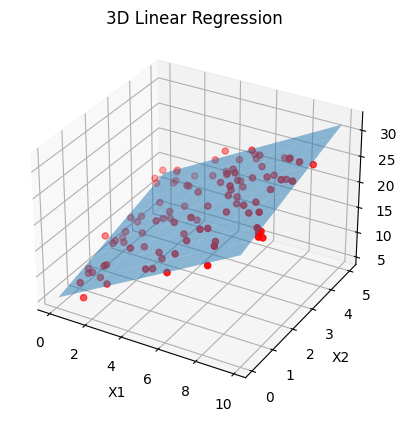

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate synthetic dataset
np.random.seed(0)
X1 = np.random.rand(100) * 10
print(X1.shape)
X2 = np.random.rand(100) * 5
print(X2.shape)
true_slope1 = 2.0
true_slope2 = 1.5
true_intercept = 5.0
noise = np.random.randn(100) * 2.0
y = true_slope1 * X1 + true_slope2 * X2 + true_intercept + noise
print(y.shape)

X = np.column_stack((X1, X2))

lr = LinearRegression(learning_rate=0.001,max_iterations=10000,tolerance=1e-6)
lr.fit(X,y)
weights = lr.weights

# Visualize the fitted plane
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(X1, X2, y, c='r', marker='o', label='Data Points')

# Plot the fitted plane
x1_plane, x2_plane = np.meshgrid(np.linspace(X1.min(), X1.max(), 10),
                                  np.linspace(X2.min(), X2.max(), 10))
X_plane = np.hstack((np.ones((100, 1)),
                     x1_plane.flatten()[:, np.newaxis],
                      x2_plane.flatten()[:, np.newaxis]
                      ))
y_plane = X_plane.dot(weights)
ax.plot_surface(x1_plane, x2_plane, y_plane.reshape(x1_plane.shape), alpha=0.5, label='Fitted Plane')

# Set labels and title
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('3D Linear Regression')

# Show the plot
plt.show()
